# Aprendizaje Automático

## Integrantes:
- Daniel Roman Ramirez
- Obed Ríos-Ruiz

# Contexto de los datos

La información con la que se cuenta es una base de ventas de una compañía cementera que distribuye distintos tipos de productos a granel y sacos a lo largo de un país en Suramerica. Dicha información contiene todo el nivel de detalle de facturación y otras características logísticas y de entrega de las ordenes, incluyendo datos sobre los clientes

# <span style="color:blue">Ingeniería de descriptores</span>

## 1. Recopilación de datos
A continuación se despliega una arquitectura teórica para la recopilación de los datos de la compañía basada en *Microsoft Azure*

### 1.1. Arquitectura

En este esquema existe una fuente de datos que es poblada por transacciones en línea ejecutadas en un sistema <tt>ERP SAP</tt> hacia tablas que son consumidas por transformadores que las llevan hacia un objeto query en <tt>BW</tt>.

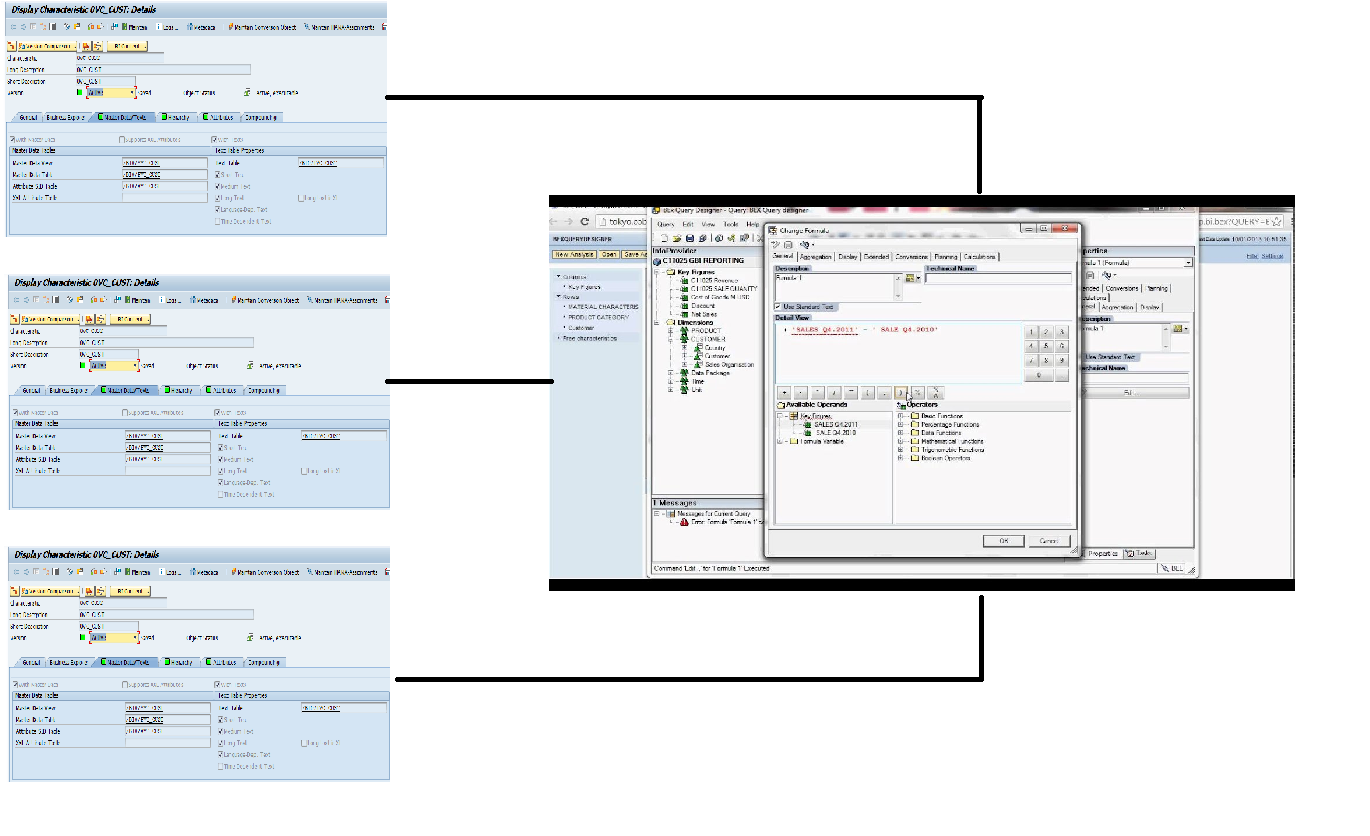

Desde allí el query es consultado mediante un query **MDX** a través de una actividad <tt>copy data</tt> en una instancia de <tt>Azure DataFactory</tt> para cada período mensual vencido y desplazado hacia un <tt>Azure DataLake</tt> en formato <tt>.csv</tt> con una configuración de extracción predeterminada (separadores, encoding y esquema).
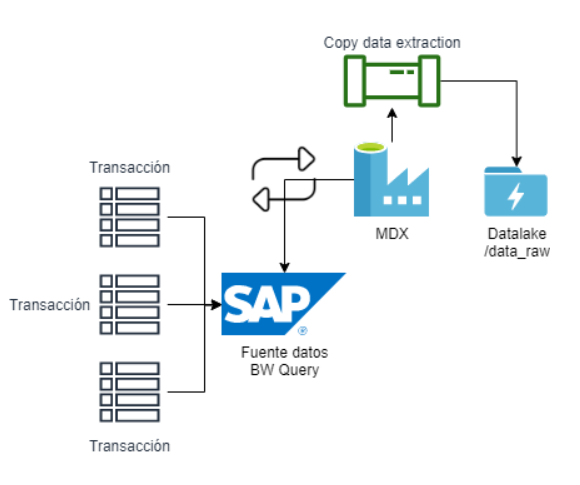

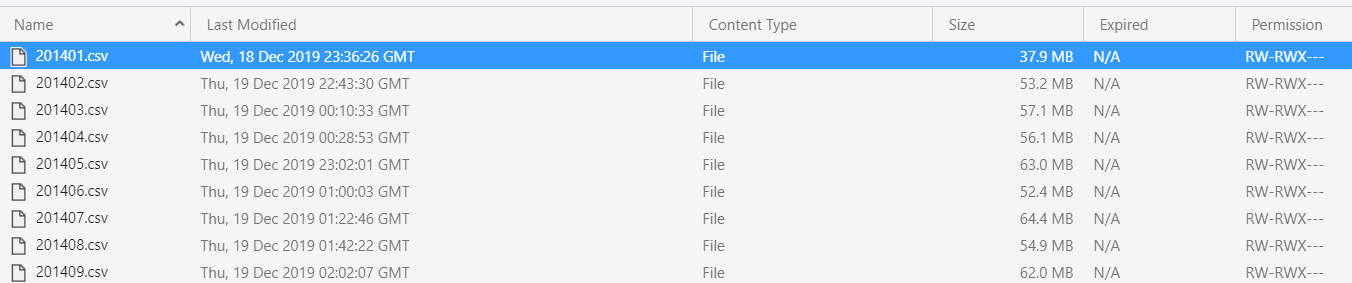

El esquema actual tiene las siguientes características

<table>
  <tr>
    <th>Positivas</th>
    <th>Negativas</th>
  </tr>
  <tr>
    <td>Parametrizable a mayor frecuencia de consulta</td>
    <td>Invasivo para el sistema ERP</td>
  </tr>
  <tr>
    <td>Alto nivel de conectividad con otros servicios</td>
    <td>Restrictivo a servicios de Microsoft</td>
  </tr>
  <tr>
    <td>Escalable a grandes movimientos de datos</td>
    <td>Pay-as-you-go o subscripción</td>
  </tr>
  <tr>
    <td>Monitoreable en sus flujos</td>
    <td>Vulnerabilidad de la información desplazada</td>
  </tr>
  <tr>
    <td>Procesamiento y transformación en línea</td>
    <td>Complejidad de las herramientas</td>
  </tr>
  <tr>
    <td>Paralelizable</td>
    <td>Estres a bodega legacy</td>
  </tr>
</table>

### 1.2. Resumen datos

Bajo una muestra de datos de un mes (2019-01) se genera el siguiente resumen de la entidad de información

<table>
  <tr>
    <th>Descripción general</th>
    <th>Nombre base</th>
    <th>Formato</th>
    <th>Cantidad de columnas</th>
    <th>Cantidad de filas</th>
    <th>Cantidad de variables categorías</th>
    <th>Cantidad de variables numéricas</th>
    <th>Cantidad de variables temporales</th>    
  </tr>
  <tr>
    <td>Información de ventas de clientes</td>
    <td>201901</td>
    <td>csv</td>
    <td>82</td>
    <td>114.590</td>
    <td>68</td>
    <td>10</td>
    <td>4</td>    
  </tr>
</table>

Las condiciones de éstos datos no se modificarán en el formato ni tampoco su esquema (presentado a continuación), por lo que se estima un volumen de datos para un año de $1.500.000$ registros.

### 1.3. Metadata

La siguiente tabla despliega el cuerpo técnico de la fuente de información, donde se expone la **variable** (nombre de negocio), su **tipo**, **id** (nombre técnico), **accepta NA's** y **ejemplo**.

<table>
  <tr>
    <th>Variable</th>
    <th>Tipo</th>
    <th>Id</th>
    <th>Acepta NA's</th>
    <th>Ejemplo</th>
  </tr>
  <tr>
    <td>Clase de Factura</td>
    <td>StringType</td>
    <td>Clase_de_Factura</td>
    <td>True</td>
    <td>Anticipado / Devolución</td>
  </tr>
  <tr>
    <td>Sociedad</td>
    <td>StringType</td>
    <td>Sociedad</td>
    <td>True</td>
    <td>Compañia S.A</td>
  </tr>
  <tr>
    <td>Segmento</td>
    <td>StringType</td>
    <td>Segmento</td>
    <td>True</td>
    <td>Detallista</td>
  </tr>
  <tr>
    <td>Tipo de negocio</td>
    <td>StringType</td>
    <td>Tipo_de_negocio</td>
    <td>True</td>
    <td>Industrial/Masivo</td>
  </tr>
  <tr>
    <td>Cliente</td>
    <td>StringType</td>
    <td>Cliente</td>
    <td>True</td>
    <td>Pepito Perez</td>
  </tr>
  <tr>
    <td>Tipologia de obra</td>
    <td>String_type</td>
    <td>Tipolog_a_de_obra</td>
    <td>True</td>
    <td>Residencial</td>
  </tr>
  <tr>
    <td>Grupo de precios</td>
    <td>StringType</td>
    <td>Grupo_de_precios</td>
    <td>True</td>
    <td>Contratista</td>
  </tr>
  <tr>
    <td>Tipo descargue</td>
    <td>StringType</td>
    <td>Tipo_descargue</td>
    <td>True</td>
    <td>Descargue mecanizado</td>
  </tr>
  <tr>
    <td>Clase de orden</td>
    <td>StringType</td>
    <td>Clase_de_orden</td>
    <td>True</td>
    <td>Sin asignar</td>
  </tr>
  <tr>
    <td>Material</td>
    <td>StringType</td>
    <td>Material</td>
    <td>True</td>
    <td>CMTO GRIS</td>
  </tr>
  <tr>
    <td>Grupo de productos</td>
    <td>StringType</td>
    <td>Grupo_de_productos</td>
    <td>True</td>
    <td>CEMENTO BLANCO<br></td>
  </tr>
  <tr>
    <td>Tipo de material</td>
    <td>StringType</td>
    <td>Tipo_de_material</td>
    <td>True</td>
    <td>ESTRUCTURAL</td>
  </tr>
  <tr>
    <td>Tipo de empaque</td>
    <td>StringType</td>
    <td>Tipo_de_empaque</td>
    <td>True</td>
    <td>40 Kg</td>
  </tr>
  <tr>
    <td>Presentacion</td>
    <td>StringType</td>
    <td>Presentaci_n</td>
    <td>True</td>
    <td>SACOS</td>
  </tr>
  <tr>
    <td>Pagador papá</td>
    <td>StringType</td>
    <td>Pagador___Pap_</td>
    <td>True</td>
    <td>Pepito Perez</td>
  </tr>
  <tr>
    <td>Planta logistica</td>
    <td>StringType</td>
    <td>Planta_log_stica</td>
    <td>True</td>
    <td>CD PT BOGOTA</td>
  </tr>
  <tr>
    <td>Subsegmento</td>
    <td>StringType</td>
    <td>Subsegmento</td>
    <td>True</td>
    <td>Edificaciones</td>
  </tr>
  <tr>
    <td>Departamento</td>
    <td>StringType</td>
    <td>Departamento</td>
    <td>True</td>
    <td>Cundinamarca</td>
  </tr>
  <tr>
    <td>Organizacion ventas</td>
    <td>StringType</td>
    <td>Organizaci_n_ventas</td>
    <td>True</td>
    <td>Regional Cementos</td>
  </tr>
  <tr>
    <td>Entrega/Retira</td>
    <td>StringType</td>
    <td>Entrega_Retira</td>
    <td>True</td>
    <td>Enviado</td>
  </tr>
  <tr>
    <td>Dirección de entrega</td>
    <td>StringType</td>
    <td>Direcci_n_de_entrega</td>
    <td>True</td>
    <td>Pepito Perez Cia</td>
  </tr>
  <tr>
    <td>Cabecera municipal SD</td>
    <td>StringType</td>
    <td>Cabecera_municipal_SD</td>
    <td>True</td>
    <td>CUN_SOACHA</td>
  </tr>
  <tr>
    <td>Hijo facturable Obra</td>
    <td>StringType</td>
    <td>Hijo_facturable___Obra</td>
    <td>True</td>
    <td>Pepito Perez SA</td>
  </tr>
  <tr>
    <td>Nombre Obra</td>
    <td>StringType</td>
    <td>Nombre_Obra</td>
    <td>True</td>
    <td>Construcción Pepito</td>
  </tr>
  <tr>
    <td>Descripcion segundas marcas</td>
    <td>StringType</td>
    <td>Descripci_n_segundas_marcas</td>
    <td>True</td>
    <td>Cemento</td>
  </tr>
  <tr>
    <td>Asesor Comercial</td>
    <td>StringType</td>
    <td>Asesor_Comercial</td>
    <td>True</td>
    <td>KKO02/Sin asignar</td>
  </tr>
  <tr>
    <td>Subsegmento destinatario mc </td>
    <td>StringType</td>
    <td>Subsegmento__destinatario_mc_a__</td>
    <td>True</td>
    <td>DETALLISTA</td>
  </tr>
  <tr>
    <td>Departamento DANE</td>
    <td>StringType</td>
    <td>Departamento_DANE</td>
    <td>True</td>
    <td>CUNDINAMARCA</td>
  </tr>
  <tr>
    <td>Departamento Destinatario mc</td>
    <td>StringType</td>
    <td>Departamento__Destinatario_mc_a__</td>
    <td>True</td>
    <td>CUNDINAMARCA</td>
  </tr>
  <tr>
    <td>Departamento SD</td>
    <td>StringType</td>
    <td>Departamento_SD</td>
    <td>True</td>
    <td>CUNDINAMARCA</td>
  </tr>
  <tr>
    <td>Regional destinatario mc a</td>
    <td>StringType</td>
    <td>Regional__destinatario_mc_a__</td>
    <td>True</td>
    <td>CENTRO</td>
  </tr>
  <tr>
    <td>Regional DANE</td>
    <td>StringType</td>
    <td>Regional_DANE</td>
    <td>True</td>
    <td>CENTRO</td>
  </tr>
  <tr>
    <td>Segmento Pagador </td>
    <td>StringType</td>
    <td>Segmento__Pagador_</td>
    <td>True</td>
    <td>DETALLISTA</td>
  </tr>
  <tr>
    <td>Tipo de negocio Pagador</td>
    <td>StringType</td>
    <td>Tipo_de_negocio__Pagador_</td>
    <td>True</td>
    <td>Masivo</td>
  </tr>
  <tr>
    <td>Planta productora</td>
    <td>StringType</td>
    <td>Planta_productora</td>
    <td>True</td>
    <td>Planta Name</td>
  </tr>
  <tr>
    <td>Descriptores clave<br></td>
    <td>ObjectType</td>
    <td>Descriptores_clave</td>
    <td>True</td>
    <td>Clase_de_Factura_Clave</td>
  </tr>
  <tr>
    <td>Ingresos presupuesto maestro</td>
    <td>DoubleType</td>
    <td>Ingresos_Presupuesto_Maestro</td>
    <td>True</td>
    <td>100555</td>
  </tr>
  <tr>
    <td>Ingresos Real</td>
    <td>DoubleType</td>
    <td>Ingresos_Real</td>
    <td>True</td>
    <td>233888</td>
  </tr>
  <tr>
    <td>Volumen presupuesto Maestro</td>
    <td>DoubleType</td>
    <td>Volumen_Presupuesto_Maestro</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Volumen Real&nbsp;&nbsp;TN</td>
    <td>DoubleType</td>
    <td>Volumen_Real__TN_</td>
    <td>True</td>
    <td>9.7</td>
  </tr>
  <tr>
    <td>Volumen proyectado TN</td>
    <td>DoubleType</td>
    <td>Volumen_Proyectado__TN_</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Precio Presupuesto Maestro</td>
    <td>DoubleType</td>
    <td>Precios_Presupuesto_Maestro</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Volumen Real M3</td>
    <td>DoubleType</td>
    <td>Volumen_Real__M3_</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Volumen Real Total TN M3</td>
    <td>DoubleType</td>
    <td>Volumen_Proyectado__M3_</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Volumen Real Total TN M3</td>
    <td>DoubleType</td>
    <td>Volumen_Real_Total__TN___M3_</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Volumen Proyectado total TN M3</td>
    <td>DoubleType</td>
    <td>Volumen_Proyectado_Total___TN___M3_</td>
    <td>True</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Dia Natural</td>
    <td>StringType</td>
    <td>D_a_natural</td>
    <td>True</td>
    <td>2019-01-01</td>
  </tr>
  <tr>
    <td>Año Natural</td>
    <td>StringType</td>
    <td>A_o_natural_Mes</td>
    <td>True</td>
    <td>2019-01<br></td>
  </tr>
</table>

Adicionalmente se cuenta con el siguiente mapa conceptual, donde se segmenta la información por nivel de jerarquía, permitiendo identificar características de mayor relevancia o algunas que resúmen la dimensión por completo.
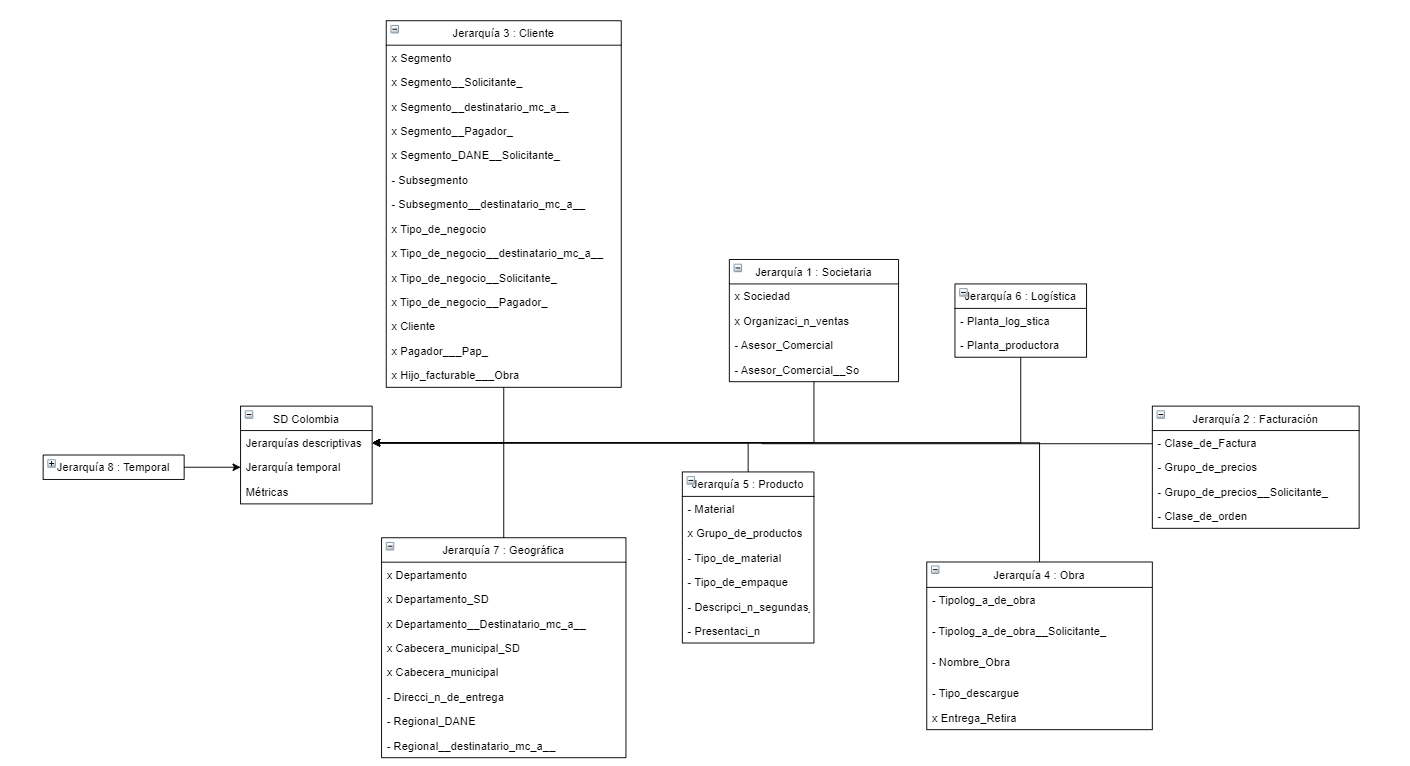

## 2. Detección de características

### 2.1. Caso de negocio

A la compañía de cementos le interesaría encontrar predicciones certeras de sus ventas en diferentes ventanas temporales, buscando asegurar niveles de confiabilidad de, al menos, $90\%$ en $1$ mes, $80\%$ a $3$ meses y $70\%$ a $6$ meses o más. Dichas predicciones deben aplicarse a todos los niveles de jerarquía que se tienen en la estructura comercial.

En la medida de lo posible se desearía anexar información macro-economica y conocimiento de mercado adicional que permita robustecer las proyecciones; no obstante, esta condición no es necesaria.

### 2.2. Interpretación caso de negocio

El problema se traduce en encontrar un modelo que consuma la información histórica (input) de las ventas de la compañía y genere estimaciones con altos niveles de certeza para la variable de volumen.

### 2.3. Detección

#### 2.3.1. Redundancia de variables

En la fuente de información, y basándose en el diagrama de jerarquías previamente expuesto, se identifica la oportunidad de remover todos los *descriptores clave*, entendidos como la representación en clave de los valores en texto o valor, así, por ejemplo, el campo <tt>"Subsegmento"</tt> (Edificaciones) tendría un campo gemelo <tt>"Subsegmento Clave"</tt> (102) el cual se retira por ser redudante. Por ello se procede a la creación de un diccionario que permita resumir claves y características y posteriormente del dataset seleccionar los campos clave relevantes.

En cuanto a las variables numéricas se conserva exclusivamente la variable <tt>"Volumen Real Total (TN - M3)"</tt>.

## 3. Extracción de características

### 3.1. Variables a considerar

Para efectos de depuración se cuenta con información de negocio suministrada por un experto, donde se entrega una lista de características conocida que facilitara el proceso de ingeniería de descriptores dadas sus características de poca redundancia y alta informatividad. Más específicamente se comparten los campos descriptivos, temporales y métricas de interés que más peso tienen en la generación de las estimaciones.

|     Tipo    	|            Variable            	|
|:-----------:	|:------------------------------:	|
| Descriptora 	| Tipo de negocio                	|
| Descriptora 	| Grupo de productos             	|
| Descriptora 	| Segmento                       	|
| Descriptora 	| Subsegmento destinatario mcía  	|
| Descriptora 	| Departamento Destinatario mcía 	|
| Descriptora 	| Sociedad                       	|
| Descriptora 	| Pagador papá                   	|
| Descriptora 	| Regional destinatario (mcía)   	|
| Temporal    	| Día natural                    	|
| Numérica    	| Volumen Real Total (TN - M3)   	|

### 3.2. Filtros a implementar

Adicionalmente el negocio indica un grupo de información en el cual le gustaría hacer enfásis, más específicamente grupos particulares de productos para sus dos líneas de negocio, dadas las dinámicas de negocio

|      Variable      	|          Filtros         	|
|:------------------:	|:------------------------:	|
| Grupo de productos 	| Cementos gris, concretos 	|
| Líneas de negocio  	| Empacado, granel         	|

### 3.3. Ejecución de extracción

In [1]:
from IPython.display import display, HTML

In [2]:
import os

from pathlib import Path

In [3]:
import pandas as pd
import datetime as dt

from sklearn import preprocessing

pd.options.display.max_columns = None

In [4]:
dir_str = r'C:\Users\orios\OneDrive - Cementos Argos S.A\Documentos\Projekte'
base_path = Path(dir_str)
projekt = '0. Bitacora\Master\CM0891\CM0891'

base_rute = os.path.join(base_path, projekt)

In [5]:
data_source = 'ds2_SALES'
data_part = '201901.csv'

path_data = os.path.join(base_path, projekt, 'data_sources', data_source, 'data', data_part)

In [6]:
base_data = pd.read_csv(path_data, sep = '|', encoding = 'UTF-8', decimal = '.', dtype = str)

In [7]:
base_data.dtypes

Clase_de_Factura                       object
Sociedad                               object
Segmento                               object
Tipo_de_negocio                        object
Cliente                                object
                                        ...  
Precios_Presupuesto_Maestro            object
Volumen_Real__M3_                      object
Volumen_Proyectado__M3_                object
Volumen_Real_Total__TN___M3_           object
Volumen_Proyectado_Total___TN___M3_    object
Length: 82, dtype: object

In [8]:
# Natural filters

base_data = base_data[base_data.D_a_natural.notnull()]
base_data = base_data[base_data.Volumen_Real_Total__TN___M3_.notnull()]

In [9]:
# Expert variables to be selected

cols_exp_desc = [
                'Tipo_de_negocio_Clave', 'Grupo_de_productos_Clave', 'Segmento_Clave', 'Subsegmento__destinatario_mc_a__',
                'Departamento__Destinatario_mc_a__', 'Sociedad_Clave', 'Pagador___Pap_', 'Regional__destinatario_mc_a___Clave'
                ]

cols_exp_met = ['Volumen_Real_Total__TN___M3_']
cols_exp_temp = ['D_a_natural']

cols_exp = [*cols_exp_desc, *cols_exp_temp, *cols_exp_met]

In [10]:
# Filters to be applied

filt_cem  = {
                'Grupo_de_productos_Clave': ['0663'],
                'Tipo_de_negocio_Clave': ['101', '100']
            }

filt_conc  = {
                'Grupo_de_productos_Clave': ['1001'],
                'Tipo_de_negocio_Clave': ['101']
            }

In [11]:
sub_data = base_data[cols_exp].copy()

for c_exp_desc in cols_exp_desc:
    sub_data[c_exp_desc] = sub_data[c_exp_desc].astype(str)
    
for c_exp_met in cols_exp_met:
    sub_data[c_exp_met] = sub_data[c_exp_met].astype(float)
    
sub_data['D_a_natural'] = pd.to_datetime(sub_data['D_a_natural'])

In [12]:
df_big = sub_data.copy()
gr_cols = [*cols_exp_temp, *cols_exp_desc]

In [13]:
df_big['Mes_natural'] = df_big['D_a_natural'].apply(lambda x: x.replace(day = 1))

In [14]:
gr_cols.remove('D_a_natural')
gr_cols.append('Mes_natural')

In [24]:
df_big_gr = df_big.groupby(gr_cols).agg({'Volumen_Real_Total__TN___M3_' : 'sum'}).reset_index(drop = False)


df_part_cem = df_big_gr.copy()
df_part_conc = df_big_gr.copy()

for fil_cem_k, fil_cem_v in filt_cem.items():
    df_part_cem = df_part_cem[df_part_cem[fil_cem_k].isin(fil_cem_v)]

for fil_conc_k, fil_conc_v in filt_conc.items():
    df_part_conc = df_part_conc[df_part_conc[fil_conc_k].isin(fil_conc_v)]

In [25]:
dic_labels = {}
for col_to_enconde in cols_exp_desc:    
    le = preprocessing.LabelEncoder()
    le.fit(df_big_gr[col_to_enconde].unique())
      
    dic_labels[col_to_enconde] = le
    
    df_part_cem[col_to_enconde] = le.transform(df_part_cem[col_to_enconde].values)
    df_part_conc[col_to_enconde] = le.transform(df_part_conc[col_to_enconde].values)

In [26]:
df_part_cem['Mes_natural'] = df_part_cem['Mes_natural'].map(dt.datetime.toordinal)     
df_part_conc['Mes_natural'] = df_part_conc['Mes_natural'].map(dt.datetime.toordinal)     

In [29]:
Y

array([2.50000e-01, 4.80000e-02, 0.00000e+00, ..., 1.14365e+03,
       1.66560e+02, 1.59259e+03])

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [40]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

array = df_part_cem.values
X = array[:,0:-1]
Y = array[:,-1]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)


print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.99958158e-01 1.85675737e-05 1.72286304e-05]
[[-1.66015880e-05 -4.44089210e-16 -1.83067758e-04  2.25143715e-04
   1.88446055e-05 -2.85442844e-07  9.99999958e-01  2.30153388e-06
   0.00000000e+00]
 [ 7.68991632e-03 -2.62984079e-15  1.02334367e-01 -3.30966278e-01
   9.35915151e-01  1.77489753e-05  7.55943932e-05  6.31877318e-02
  -0.00000000e+00]
 [ 1.14979855e-02 -3.78690135e-15  1.18101659e-01 -9.32186084e-01
  -3.41659503e-01  5.70264949e-05  2.38159746e-04 -1.47520755e-02
  -0.00000000e+00]]


In [38]:
pd.DataFrame(fit.components_, columns = df_part_cem.columns[0:-1])

,Tipo_de_negocio_Clave,Grupo_de_productos_Clave,Segmento_Clave,Subsegmento__destinatario_mc_a__,Departamento__Destinatario_mc_a__,Sociedad_Clave,Pagador___Pap_,Regional__destinatario_mc_a___Clave,Mes_natural
0,-0.000017,-4.440892e-16,-0.000183,0.000225,0.000019,-2.854428e-07,1.000000,0.000002,0.0
1,0.007690,-2.629841e-15,0.102334,-0.330966,0.935915,1.774898e-05,0.000076,0.063188,-0.0
2,0.011498,-3.786901e-15,0.118102,-0.932186,-0.341660,5.702649e-05,0.000238,-0.014752,-0.0


In [42]:
import time

In [43]:
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[5.91209616e+06 1.09777874e+02 1.01861582e+02]


ValueError: Unknown label type: 'continuous'

# 4. Metodología SLR 

# Tema :Técnicas de aprendizaje con desbalance de clases

## Definición Metodología SLR

Antes de proceder a diseñar un protocolo de  búsqueda es importante entender como se desarrolla y el para qué sirve.

La metodología SLR, Systematic Literature Review por sus siglas en inglés, es un método que tiene como objetivo realizar una búsqueda exhaustiiva de estudios relevantes sobre un tema y luego de identificar y obtener los estudios, los resultados son verificados por medio de un método establecido y explícito, de esta forma al investigador da una posibilidad de replicar y verificar si se llega a la misma conclusión.

En otras palabras la revisión sistemática es una metodología reproducible, auditable y sistemática para formular preguntas de investigación relevantes sobre un área temática y para buscar, seleccionar, analizar y sintetizar toda la investigación relevante, empírica o teórica, necesaria para responder dichas preguntas de investigación.

Esta metodología fue desarrollada inicialmente en medicina y ciencias de la salud, posteriormente Kitchenham y Charters la adaptaron para el uso de la ingeniería de software.

# Protocolo de búsqueda

1. Definición de preguntas de investigación y objetivos
2. Definición de criterios de inclusión para la SLR
3. Definición de criterios de exclusión para la SLR
4. Identificación de fuentes de información, motores de búsqueda
5. Definición de terminos de búsqueda
6. Identificación y búsqueda de bases de datos cietíficas y extraer información significativa
7. Evaluación de resultados
8. Consolidación de los resultados mas sobresalientes

# Step by Step

1. Preguntas de investigación
2. Criterios de inclusión
3. Criterios de exclusión
4. Bases de datos
5. Terminos de búsqueda
6. Fases de revisión
7. Evaluación de calidad
8. Trazabilidad y reporte de resultados

##  1. Preguntas de investigación

- ¿Cuantos estudios han sido publicados en años anteriores sobre Técnicas de aprendizaje con desbalance de clases?
- ¿Cuáles son los autores mas relevantes del desarrollo de esta metodología?
- ¿En qué áreas de la analítica se ha utilizado más esta técnica?
- ¿Que tipo de soporte comuputacional y técnicas de aprendizaje automático han desarrollado con este método?
- ¿Cómo y en donde han sido usados este desarrollo computacional?
- ¿ Cuál ha sido aporte en los resultados finales en las aplicaciones?

# 2. Criterios de inclusión

- Metodología usada en casos reales
- técnicas, modelos, herramientas, framework
- Soluciones propuestas que han sido aplicadas en la industria
- Documentación escrita en inglés
- Documentación expuesta en conferencias, eventos de analítica

# 3. Criterios de Exclusión

- Metodologías que no han sido aplicados en la vida real
- Solucione propuestas que son de ejemplos creados para la academia
- Documentación que no estén en inglés
- Documentación que no ha sido publicada en conferencias, eventos de analítica o soportada por la academia



# 4. Base de datos

- Identificación de la fuente de datos
- Formato de la base de datos
- Estructuración y limpieza de la base de datos
- No hay limite de cantidad de base de datos
- Contenido de caracteres especiales

# 5. Terminos de búsqueda

- Diseño de arquitectura 
- Creación de bodega de datos en la nube
- Interacción con la nube para la realización de consultas y posteriores análisis (SQL)

# 6. Fases de revisión

- Ejecución de consultas
- Selección de descriptores/características
- Implementación óptima de la metodología
- Revisión de argumentos de los resultados obenidos
- Revisión de ortografía y citas bibliográficas

# 7. Evaluación de calidad

- Lista de verificación de los aspectos mas relevantes de la metodología aplicada
- Asignación de puntaje por cada ítem en la lista
- Fijación de puntos de corte

## Check list

- ¿La metodología tiene un gran aporte para la soluciones analíticas en el mundo real?
- ¿La metodología ha tenido una evolución de mejora a través del tiempo?
- ¿Se econtró una metodología de desarrollo?
- ¿Las tecnicas usadas tienen resultados óptimos?
- ¿Se cumple el objetivo de la técnica en los resultados finales?
- ¿ Se evidencia citas bibliográficas, investigaciones, soporte documental de la técnica?

# 8. Trazabilidad y reporte de resultados

- Se utiliza un almacenamiento en la nube con el fin de tener escalabilidad en las bases de datos
- Se crea un sitio de desarollo en Github, allí se almacenará todo el seguimiento de lo que se trabaja
- El desarrollo tiene escalabilidad con el fin de evitar condiciones de uso, utilizando algoritmos en python y almacenamiento en la nube
- Documento científico donde se reportarán los resultados obtenidos y el código desarrollado.
- Expoosición final donde se argumente los procedimientos descritos anteriormente.
- Se crean tablas y gráficos, para tener explicaciones visuales y tener una discusión final de los resultados para que se ponga en valor las aportaciones del estudio sistemático.